# Predicting Housing Prices using machine learning

This is a practice model to get the steps involved in machine learning.


we are going to 
<ol>
<li>Look at the big picture</li>
<li>Get data</li>
<li>Dscover the data to gain insights</li>
<li>Prepare the data for the machine learning model</li>
<li>Select a model and train it</li>
<li>Finetune the model</li>
<li>Present the solution</li>
<li>Launch the system</li>
</ol>

## Looking at the big picture
## Describing the problem


In this example, we use the California Housin Prices datasets. it is based on the 1990 California cencus.

The first task is to build a model of housing prices in Cali.


District prices are estimated manually which is time consuming. The boss wants a model that can predict the median housing price in a district given data about the district. 


The problem requires the building of a 
<ul>
<li>Supervised -> The data is labelled with the true median value</li>
<li>Regression -> We are asked to predict a value</li>
<li>Multiple regression-> We will use multiple features to make a prediction</li>
<li>Univariate regression -> We are using going to predict a single value for each district</li>
</ul>


## Selecting a performance metric

A typical performance measure for regression problems is the Root Mean Square Error

RMSE is a cost function. 



## Get the data

we have the dataset in the data folder. Next, we have to load the dataset into a pandas dataframe

In [9]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("data/housing.csv")

In [3]:
#check the first instances of the housing data dataframe
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents one block. There are 10 attributes. One can use the info methos to get a quick description of the data.

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Things to note about the dataset

<ul>
<li> <strong>NB</strong>: You notice that the total bedrooms feature has 20433 as opposed to 20640. Will be taken care of.</li>
<li> All features have numerical values except the ocean proximity feature. The following code shows the feature </li>

In [5]:
#value counts function helps us know how many instances belong to each category.

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

the describe method is used to show a summary of all numerical attributes

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another approach is to plot a histogram for every numerical attribute. 

In [7]:
import matplotlib.pyplot as plt

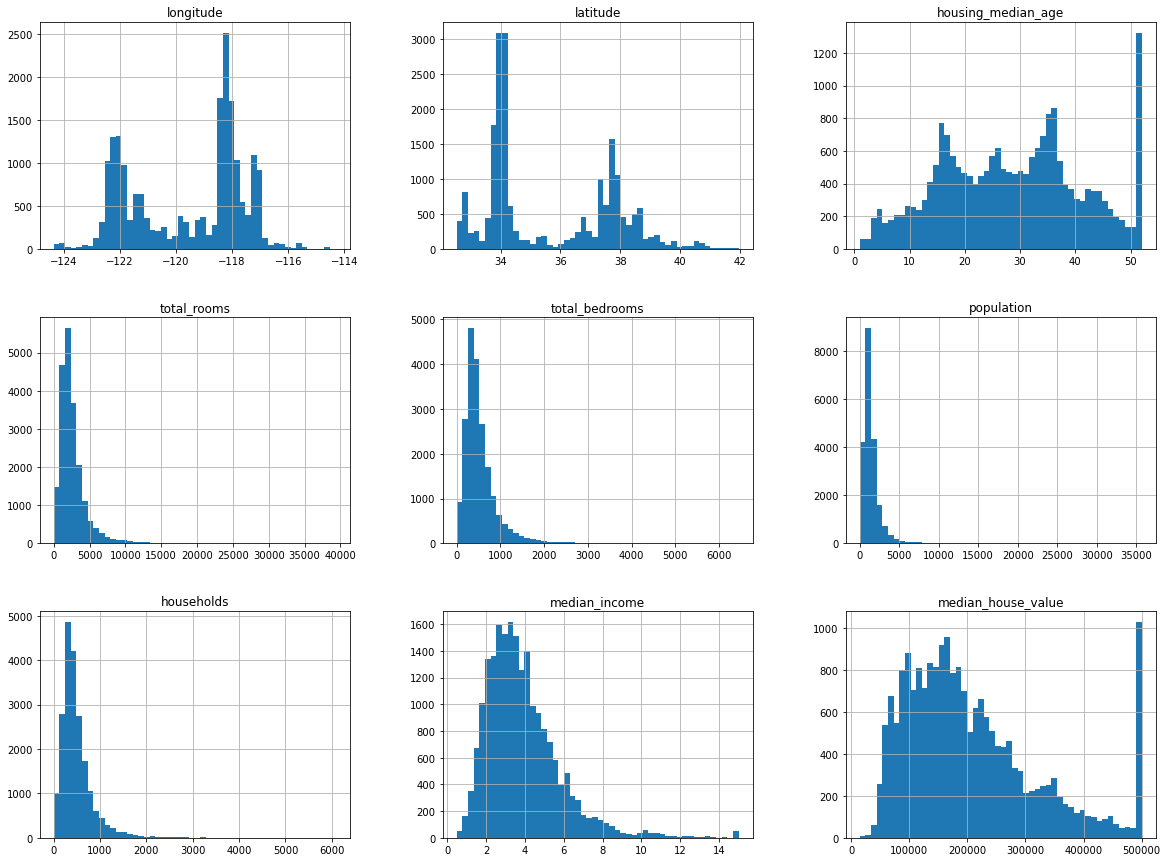

In [8]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

The several things to note from the histograms are:
<ul>
<li>The median income has a scale running from 0-15. Each number represents $10,000</li>
<li>Housing median age and median house value are also capped

This is a serious problem because house value is the target value.
</li>
<li>The attributes have different scales.</li>
<li>The histograms are tail heavy. they extend further to the right of the median than to the left. </li>

## Splitting the dataset into train test, set


### Pure Random Strategy


the split will be done 80/20

the split is implemented such that even with multiple runs, the train and test set will contain similar instances.

that is, the model will not see data that was in the test set.

In [11]:
from zlib import crc32


def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32


def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]



Next, we give the dataset an identifier column. The simplest solution is to use the row index as the ID.

In [12]:
#next, we give the dataset an identifier column. The simplest solution is to use the row index as the ID.

housing_with_id = housing.reset_index() #adds an index column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

### Stratified sampling method

Median income is said to be very important when determining house value. We would thus like the median income to be representative of the various categories of incomes in the dataset. 

The median column ranges from 0 to 15. However, most of the instances are clustered towards the 0-6 interval. However, there are more incomes further away towards 15.

We will use the <code>pd.cut()</code> function to create an income category with five categories. Each category will range from 0 to 1.5

Ensure that you do not have too many strata and that the strata are big enough

<AxesSubplot:>

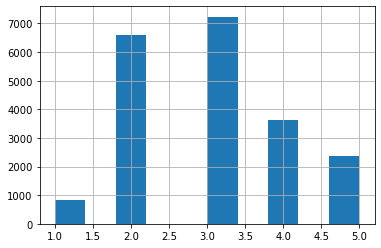

In [13]:
#dividing the income column into categories

housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins = [0.,1.5,3.0,4.5,6.,np.inf],
    labels=[1,2,3,4,5])


housing["income_cat"].hist()

Now that we have the income as categorical data, we can do stratified sampling using the Scikit-learn <code>StratifiedShuffleSplit</code> class. 

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]


Test whether it works

In [15]:
strat_test_set["income_cat"].value_counts()

3    1447
2    1316
4     728
5     472
1     165
Name: income_cat, dtype: int64

Now we should remove the income_cat attribute so that the data is back to its normal state.

In [16]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)


## Discover and Visualize the Data to Gain Insights

We have only lightly analyze the data. In this section, we go deeper. 

In [17]:
# creating a copy of the training set

housing = strat_train_set.copy()

Visualizing the data since it has longitude and latitude data. Each dot on the map represents a district or a block.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

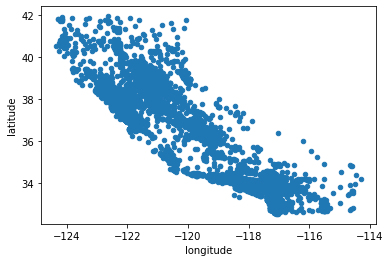

In [18]:
housing.plot(kind="scatter",x="longitude",y="latitude")

Next, we can decreace the opacity of points to see where there is a large concentration of points

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

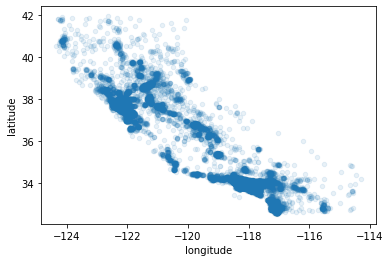

In [19]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

Next, we look at housing prices. The radius of each circle will correspond to the district's population. (option s) and the color will represent the price (option c). We will then use a predefined colormap called het that ranges from blue values to red (high prices).

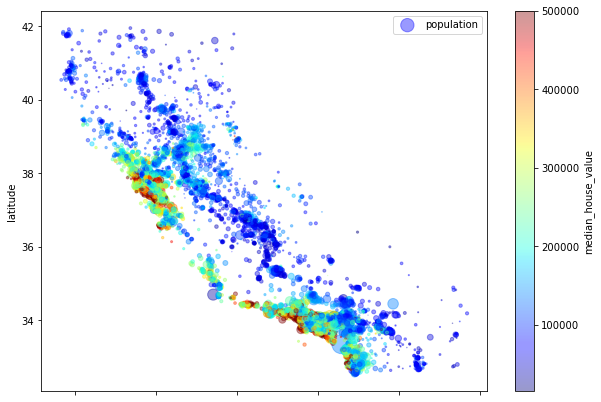

In [20]:
housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             alpha=0.4,
             s=housing["population"]/100,
             label="population",
             figsize=(10,7),
             c="median_house_value",
             cmap=plt.get_cmap("jet"),
             colorbar=True
             )
plt.legend()

The visualization shows that the price of a house is highly related to the location and population density. 

We can use a clustering algorithm to detect the main cluster, and add a new features that can measure the proximity of a point to the cluster center. 

The proximity to the ocean is also a major factor, though the rule does not work in the northern area of the state.

### Looking for correlations

Since the dataset is not too large, we can easily compute the standard correlation coefficient, also called the pearson's R using the corr() method.

In [21]:
#create a correlation matrix
corr_matrix = housing.corr()

We can then look at how much each attribute correlates with the median house value. 

In [22]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

The top positive correlation is median income. A high median income is more likely to result in high median house values.

The top negative correlation is latitude. The prices of homes tend to go down as latitude increases (we go north.)

Another way to check for correlation is to use the panda's scatter matrix function.

We noticed that the median income is the most positively correlated attribute. we thus plot it.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

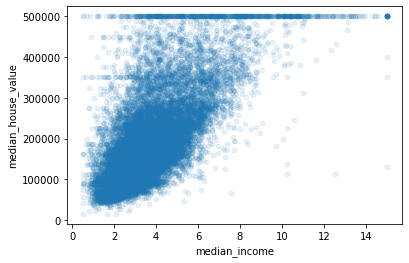

In [23]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

there is a positive correlation and it is strong. We also notice that the median house price has been capped at $500k. 

A keen eye will also notice a horizontal line around $350k and $450k, and other less noticeable one. 

A possible solution is to remove those districts lest the model learn to reproduce the data quirks. 

#### What we have learned about the data so far

There are some data quirks we need to take care of

some of the attributes have a tail heavy distribution. 

there are interesting correlations between some attributes and the target attribute. 

## Experimenting with Attribute combinations

One can also experiment with attribute combinations to create data with strong signals. 

In this case, we have the total rooms attribute. we can make the attribute better by knowing the number of rooms per household.

Next, we can also create a new attribute that shows the total number of bedrooms per household.

Finally, we can create a new attribute that shows the number of people per household (population per household)

In [24]:
#creating the rooms per household attribute
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

#creating the bedrooms per house attribute
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]

#creating the population per household attribute
housing["population_per_household"] = housing["population"]/housing["households"]

Now we can try to do the correlation matrix again ans see what has changed

In [25]:
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

One of the new attributes, the bedrooms per room, has given a good signal. It has a strong negative correlation to the number of median house value. This suggests that the as the prices of houses go up, the number of bedrooms per room goes down.

## Preparing the data for a machine learning algorithm

we first get a clean training set.

we have to separate the predictors from the labels so we dont apply the transformation.

the drop function creates a copy of the data and does not affect the <code>strat_train_set</code>



In [ ]:
housing = strat_test_set.drop("median_house_value",axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

### Data cleaning

We noticed that there were some missing attributes. These were in the <code>total_bedrooms</code> column

there are three options to use:

1. get rid of the corresponding districts

<code>housing.dropna(subset=["total_bedrooms"])</code>

2. get rid of the whole attribute

<code>housing.drop("total_bedrooms",axis=1)</code>

3. set the values to zero, mean, or median

<code>
    median = housing["total_bedrooms"].median()
    
    housing["total_bedrooms"].fillna(median, inplace=True)
</code>


For option 3, also called imputation, Scikit-Larn provides a handy class to take care of the missing values.

the <code>SimpleImputer</code> requires one to create a SimpleImputer instance, specifying that you ant to replace each attribute's missing values ith the median of that value

To use the imputer, first ensure that all columns in the dataset are numerical in nature.

In [26]:
#we have to drop the ocean proximity attribute
housing_num = housing.drop("ocean_proximity",axis=1)

Create an instance of the imputer class choose the median strategy. 

Then, fit the data into the imputer.

the statistics_ instance variable contains the median of every attribute.

In [27]:
#import and use the imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

#fit function is an estimator
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        1.79500000e+05,  5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

Now you can use the tained imputer to transform the training set by replacing all the missing values by the learned medians.

In [32]:
X = imputer.transform(housing_num)

You could also turn it into a pandas dataframe

In [35]:
housing_tr = pd.DataFrame(X,columns = housing_num.columns)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   rooms_per_household       16512 non-null  float64
 10  bedrooms_per_room         16512 non-null  float64
 11  population_per_household  16512 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB
